# Titanic Survival Prediction 
### In this i have covered most of ensemble models. Hope you guys like it. Don't forget to give Upvote :)



In [1]:
%%time
import numpy as np 
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns

['train.csv', 'gender_submission.csv', 'test.csv']
CPU times: user 328 ms, sys: 36 ms, total: 364 ms
Wall time: 520 ms


## Importing and exploring data

In [2]:
train=pd.read_csv("../input/train.csv")

In [3]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Don't forget to explore object type columns

In [5]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Olsen, Mr. Karl Siegwart Andreas",male,1601,B96 B98,S
freq,1,577,7,4,644


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1eff64fd0>,
      dtype=object)

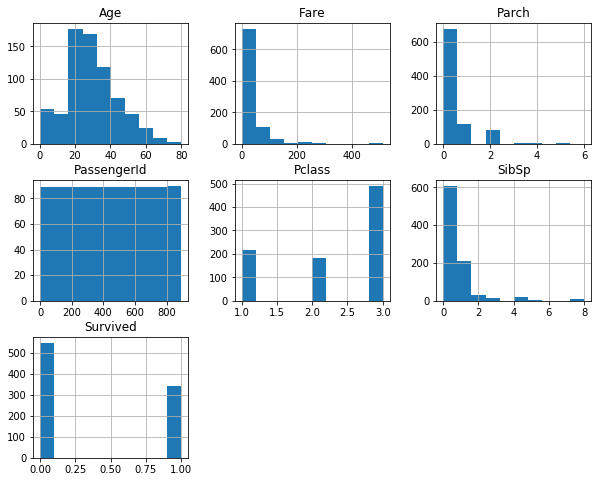

In [6]:
train.hist(figsize=(10,8))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## So column Age, Cabin, Embarked have missing values. Let's Start with Age column

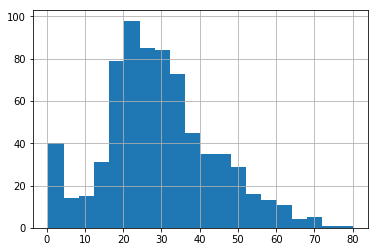

In [8]:
train.Age.hist(bins=20)

## Age distribution is positive skewed. Need more information to fill missing data. Let's plot Age with PClass

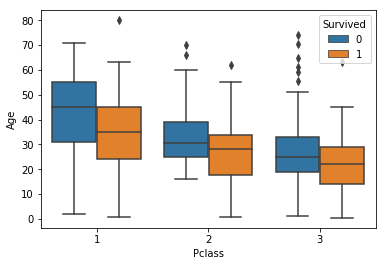

In [9]:
sns.boxplot(x='Pclass',y='Age',data=train,hue='Survived')

In [10]:
print (train.groupby(['Pclass']).get_group(1).Age.mean())
print (train.groupby(['Pclass']).get_group(2).Age.mean())
print (train.groupby(['Pclass']).get_group(3).Age.mean())

38.233440860215055
29.87763005780347
25.14061971830986


## We can fill missing age with mean but age varies for each Pclass so filling missing age with mean will not be proper. Lets fill Age according to Pclass 

In [11]:
train['Age']=train.groupby(['Pclass','Survived'])['Age'].transform(lambda x:x.fillna(x.mean()))

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Now lets take a look at Fare column. May be it want to something to us

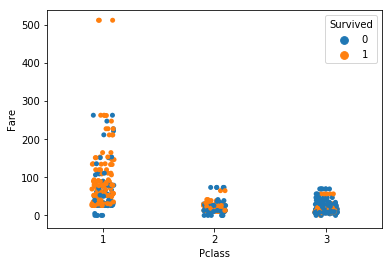

In [13]:
sns.stripplot(y='Fare',x='Pclass',hue='Survived',data=train)

## From above figure we can say that people who paid higher got 1st Pclass and there chanced of survival are better than other Pclass. 
## Let's see average Fare based on class

In [14]:
train.groupby(['Pclass','Survived'])['Fare'].mean()

Pclass  Survived
1       0           64.684008
        1           95.608029
2       0           19.412328
        1           22.055700
3       0           13.669364
        1           13.694887
Name: Fare, dtype: float64

Text(0, 0.5, 'count')

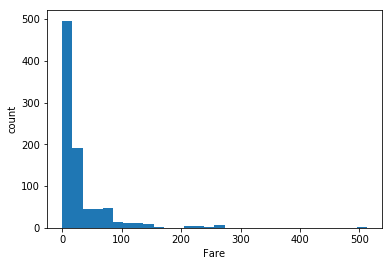

In [15]:
plt.hist(train.Fare,bins=30)
plt.xlabel('Fare')
plt.ylabel('count')

## Most of the people paid 0-80 Fare. Fare varies based on Pclass and Survival. Survived people paid higher fare than people who died. So we need to utilise fare column. Since Fare as an integer column will not be usefull. Lets make it Categorical 

In [16]:
train.Fare=np.ceil(train.Fare)
train['fare']=pd.cut(train.Fare,bins=[0,8,13,20,30,50,80,600],labels=['a','b','c','d','e','f','g'],right=False)

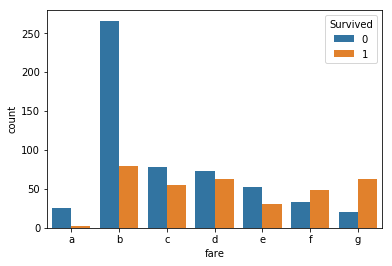

In [17]:
sns.countplot(x='fare',hue='Survived',data=train)

## Thats look nice!!! As Fare increases (a to g) chances of survival increases.
## Fare really wanted to tell us something :)

## Lets see now SibSp and Parch Columns

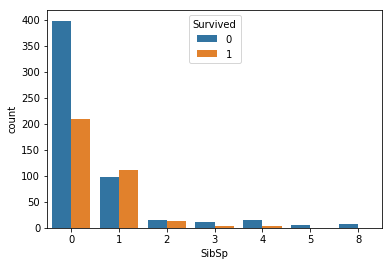

In [18]:
sns.countplot(x='SibSp',hue='Survived',data=train)

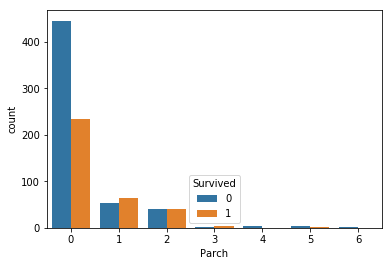

In [19]:
sns.countplot(x='Parch',hue='Survived',data=train)

## Lets combine both columns. As both column represent members

In [20]:
train['members']=train['SibSp']+train['Parch']

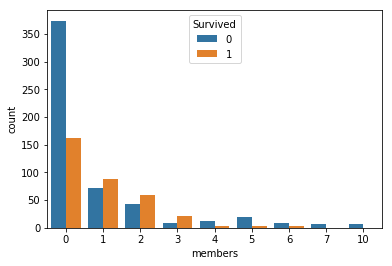

In [21]:
sns.countplot(x='members',hue='Survived',data=train)

In [22]:
train.members.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: members, dtype: int64

In [23]:
train[train.members>6].Survived.value_counts()


0    13
Name: Survived, dtype: int64

## Members with head count of more than 6 never survived in our train dataset so lets make 6+ members that is 7 and 10 members as 7 members

In [24]:
train.members.replace({10:7},inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare,members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,8.0,NaN,S,b,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,72.0,C85,C,f,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,8.0,NaN,S,b,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,54.0,C123,S,f,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,9.0,NaN,S,b,0


## Now lets choose our feature attributes. Name is not giving us any proper info so lets drop it. Cabin column have various missing values and filling it may affect our prediction so drop it to. Ticket also not needed so drop it.

In [26]:
attributes=['Survived','Pclass','Sex','Age','Embarked','fare','members']

In [27]:
train=train[attributes]

In [28]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,fare,members
0,0,3,male,22.0,S,b,1
1,1,1,female,38.0,C,f,1
2,1,3,female,26.0,S,b,0
3,1,1,female,35.0,S,f,1
4,0,3,male,35.0,S,b,0


## Wait !!! Embarked also have 2 mising values. So lets do filling. But first we need to explore Embarked column

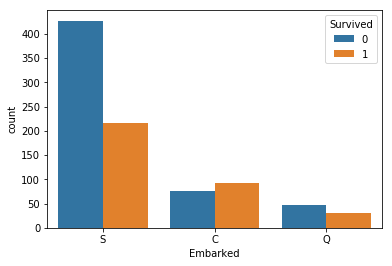

In [29]:
sns.countplot(x='Embarked',hue='Survived',data=train)

In [30]:
train[train.Embarked.isnull()]

,Survived,Pclass,Sex,Age,Embarked,fare,members
61,1,1,female,38.0,NaN,g,0
829,1,1,female,62.0,NaN,g,0


## Two missing values belong to same Pclass and Same Sex with same Fare category ie g. Lets explore further more

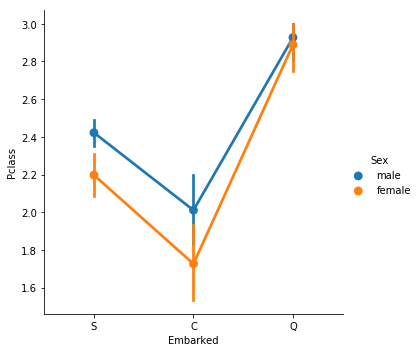

In [31]:
sns.catplot(kind='point',x='Embarked',y='Pclass',hue='Sex',data=train)

In [32]:
train.groupby(['Pclass','Sex']).get_group((1,'female')).Embarked.value_counts()

S    48
C    43
Q     1
Name: Embarked, dtype: int64

## So with above exploration we can say that female which belong to Pclass 1 have C Embarked most probably. Lets fill it

In [33]:
train.Embarked.fillna('C',inplace=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Embarked    891 non-null object
fare        891 non-null category
members     891 non-null int64
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 43.1+ KB


## No missing value finally. Now lets do type conversion

In [35]:
def func(x):
    if(x.dtype=='O'):
        x=x.astype('category')
    return(x)

In [36]:
train=train.apply(func,axis=0)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null category
Age         891 non-null float64
Embarked    891 non-null category
fare        891 non-null category
members     891 non-null int64
dtypes: category(3), float64(1), int64(3)
memory usage: 31.1 KB


In [38]:
train.members=train.members.astype('category')
train.Survived=train.Survived.astype('category')
train.Pclass=train.Pclass.astype('category')
train.Age=train.Age.astype('int64')

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null category
Pclass      891 non-null category
Sex         891 non-null category
Age         891 non-null int64
Embarked    891 non-null category
fare        891 non-null category
members     891 non-null category
dtypes: category(6), int64(1)
memory usage: 13.4 KB


## Now lets convert categorical values into dummy variable and Scaling 

In [40]:
df_label=train.Survived
del train['Survived']
df=pd.get_dummies(train)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaled=StandardScaler().fit_transform(df)
df=pd.DataFrame(scaled,index=df.index,columns=df.columns)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
df=pd.concat([df,df_label],axis=1)

In [44]:
df.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fare_a,fare_b,fare_c,fare_d,fare_e,fare_f,fare_g,members_0,members_1,members_2,members_3,members_4,members_5,members_6,members_7,Survived
0,-0.541179,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.485576,-0.307562,0.619306,-0.180125,1.255048,-0.418882,-0.42442,-0.322629,-0.316228,-0.320504,-1.231645,2.129357,-0.359552,-0.183419,-0.130856,-0.159111,-0.116841,-0.121681,0
1,0.658673,1.767767,-0.510152,-1.107926,1.355574,-1.355574,2.059412,-0.307562,-1.614710,-0.180125,-0.796783,-0.418882,-0.42442,-0.322629,3.162278,-0.320504,-1.231645,2.129357,-0.359552,-0.183419,-0.130856,-0.159111,-0.116841,-0.121681,1
2,-0.241216,-0.565685,-0.510152,0.902587,1.355574,-1.355574,-0.485576,-0.307562,0.619306,-0.180125,1.255048,-0.418882,-0.42442,-0.322629,-0.316228,-0.320504,0.811922,-0.469625,-0.359552,-0.183419,-0.130856,-0.159111,-0.116841,-0.121681,1
3,0.433701,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-0.485576,-0.307562,0.619306,-0.180125,-0.796783,-0.418882,-0.42442,-0.322629,3.162278,-0.320504,-1.231645,2.129357,-0.359552,-0.183419,-0.130856,-0.159111,-0.116841,-0.121681,1
4,0.433701,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.485576,-0.307562,0.619306,-0.180125,1.255048,-0.418882,-0.42442,-0.322629,-0.316228,-0.320504,0.811922,-0.469625,-0.359552,-0.183419,-0.130856,-0.159111,-0.116841,-0.121681,0


# Now our data is ready now its time to use it for model building and prediction

In [45]:
train=df
train.shape

(891, 25)

In [46]:
index=np.random.permutation(891)
train=train.loc[index,:]
train.shape

(891, 25)

In [47]:
train_label=train.Survived
del train['Survived']

# 1. Linear Classifier

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

In [49]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(n_iter=200,penalty='l1',epsilon=1e-20,random_state=8349)
score=cross_val_predict(sgd,train,train_label,cv=10)
confusion_matrix(train_label,score)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: 

array([[469,  80],
       [101, 241]])

In [50]:
from sklearn.metrics import accuracy_score
acc_lc=accuracy_score(train_label,score)
acc_lc

0.7968574635241302

# 2. logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=73289471,class_weight='balanced')
score=cross_val_predict(lr,train,train_label,cv=10)
confusion_matrix(train_label,score)

array([[449, 100],
       [ 73, 269]])

In [52]:
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(train_label,score)
acc_lr

0.8058361391694725

# 3. KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
value=[]
for k in range(1,20):
    knn=KNeighborsClassifier(k,algorithm='brute')
    score=cross_val_predict(knn,train,train_label,cv=10)
    value.append(accuracy_score(train_label,score))

In [54]:
df=pd.DataFrame(value,index=range(1,20),columns=['accuracy'])

In [55]:
df.set_index='K value'
df.sort_values(ascending=False,by='accuracy')

,accuracy
7,0.802469
5,0.797980
6,0.795735
9,0.794613
11,0.787879
8,0.787879
4,0.785634
13,0.784512
10,0.784512
12,0.783389


## So KNN give best result when k=7. lets train with k=7

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(7,algorithm='brute')
score=cross_val_predict(knn,train,train_label,cv=10)
acc_knn=accuracy_score(train_label,score)
acc_knn

0.8024691358024691

# 4. Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1341)
score=cross_val_predict(dtc,train,train_label,cv=10)
confusion_matrix(train_label,score)

array([[468,  81],
       [ 93, 249]])

In [58]:
acc_dtc=accuracy_score(train_label,score)
acc_dtc

0.8047138047138047

# 5. SVM

In [59]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',C=20,gamma=0.05,random_state=2317)
score=cross_val_predict(svm,train,train_label,cv=10)
confusion_matrix(train_label,score)

array([[499,  50],
       [109, 233]])

In [60]:
acc_svm=accuracy_score(train_label,score)
acc_svm

0.8215488215488216

# 6.Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=167123)
score=cross_val_predict(rf,train,train_label,cv=10)
confusion_matrix(train_label,score)

array([[465,  84],
       [ 97, 245]])

In [62]:
acc_rf=accuracy_score(train_label,score)
acc_rf

0.7968574635241302

# 7 Extra Tree

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=200,random_state=67)
score=cross_val_predict(etc,train,train_label,cv=10)
confusion_matrix(train_label,score)

array([[464,  85],
       [104, 238]])

In [64]:
acc_etc=accuracy_score(train_label,score)
acc_etc

0.7878787878787878

# 8. ADA BOOSTING

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(dtc,n_estimators=200,
algorithm='SAMME.R',learning_rate=0.01,random_state=13247)
score=cross_val_predict(ada,train,train_label,cv=10)
confusion_matrix(train_label,score)

array([[463,  86],
       [ 86, 256]])

In [66]:
acc_ada=accuracy_score(train_label,score)
acc_ada

0.8069584736251403

# 9. Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=200,learning_rate=0.01,random_state=11233)
score=cross_val_predict(gb,train,train_label,cv=10)
confusion_matrix(train_label,score)

array([[509,  40],
       [114, 228]])

In [68]:
acc_gb=accuracy_score(train_label,score)
acc_gb

0.8271604938271605

# 9. Bagging And Pasting

In [69]:
from sklearn.ensemble import BaggingClassifier
bp=BaggingClassifier(SVC(kernel='rbf',C=20,gamma=0.05,random_state=87),n_estimators=200, bootstrap=False ,
                     n_jobs=-1,random_state=82139 )
score=cross_val_predict(bp,train,train_label,cv=10)
confusion_matrix(train_label,score)

array([[499,  50],
       [109, 233]])

In [70]:
acc_bp=accuracy_score(train_label,score)
acc_bp

0.8215488215488216

In [71]:
df=pd.DataFrame([acc_lc*100,acc_lr*100,acc_knn*100,acc_dtc*100,acc_svm*100,acc_rf*100,
             acc_etc,acc_ada*100,acc_gb*100,acc_bp*100],
            index=['Linear Classifier','Logistic','KNN','Decision Tree','SVM','Random Forest',
                  'Extra Trees','ADA boost','Gradient Boost','Bagging and pasting'],columns=['Accuracy'])

In [72]:
df=df.sort_values(ascending=False,by='Accuracy')

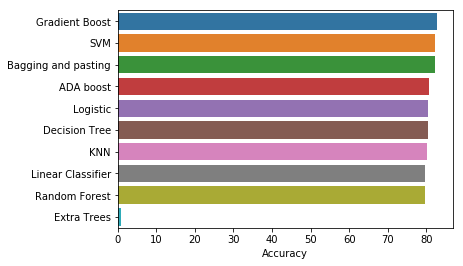

In [73]:
color=sns.color_palette
sns.barplot(data=df, y=df.index,x='Accuracy')
#plt.xticks(rotation=90)

# Now Random Search on Best Models

# Gradient Boost

In [77]:
from sklearn.model_selection import RandomizedSearchCV
def r_search(classifier,param,data,data_label,fold):
    rs=RandomizedSearchCV(classifier,param_distributions=param,cv=fold,n_jobs=-1)
    rs.fit(data,data_label)
    return(rs.best_params_ , rs.best_score_, rs.best_estimator_)

In [78]:
param={'max_features':[7,9,13,],'max_depth':[5,7,9,12],'min_samples_split':[25,40,55],
       'min_samples_leaf':[3,5,13,23],'max_leaf_nodes':[3,7,13,19],
      'n_estimators':[100,200,500,1000],'learning_rate':[1,0.1,0.01,0.001]}
best_param , best_score , best_estimator= r_search(GradientBoostingClassifier(random_state=9248309),
                                 param,train,train_label,10)

In [79]:
print(best_param,'\n' ,best_score)

{'n_estimators': 100, 'min_samples_split': 55, 'min_samples_leaf': 5, 'max_leaf_nodes': 13, 'max_features': 13, 'max_depth': 12, 'learning_rate': 0.1} 
 0.8417508417508418


In [81]:
gb=best_estimator

# 10.Voting Classifier

In [82]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('rf',svm),('gb',gb),
                                ('svm',lr)],voting='hard')
score=cross_val_predict(vc,train,train_label,cv=10)
confusion_matrix(train_label,score)

array([[489,  60],
       [ 88, 254]])

In [83]:
acc_vc=accuracy_score(train_label,score)
acc_vc

0.8338945005611672

# So Finally we got our best algorithm with accuracy of 84.73% Gradient Boosting

In [84]:
gb.fit(train,train_label)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=12,
              max_features=13, max_leaf_nodes=13,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=55,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=9248309,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

# Now we have to import test file and process it before prediction

In [85]:
test=pd.read_csv('../input/test.csv')

In [86]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
attributes=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
test=test[attributes]

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


In [89]:
test['Age']=test.groupby('Pclass')['Age'].transform(lambda x:x.fillna(x.mean()))

In [90]:
test.Embarked.fillna('C',inplace=True)

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


In [92]:
test['members']=test['SibSp']+test['Parch']
del test['SibSp']
del test['Parch']

In [93]:
test.members.replace({10:7},inplace=True)

In [94]:
test.Fare=np.ceil(test.Fare)
test['fare']=pd.cut(test.Fare,bins=[0,8,13,20,30,50,80,600],labels=['a','b','c','d','e','f','g'],right=False)

In [95]:
test.members=test.members.astype('category')
test.Pclass=test.Pclass.astype('category')
test.Age=test.Age.astype('int64')
test.fare=test.fare.astype('category')
test.Embarked=test.Embarked.astype('category')

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null category
Sex         418 non-null object
Age         418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null category
members     418 non-null category
fare        417 non-null category
dtypes: category(4), float64(1), int64(1), object(1)
memory usage: 12.5+ KB


In [97]:
test.fare.value_counts()

b    160
c     68
d     67
g     43
f     38
e     32
a      9
Name: fare, dtype: int64

In [98]:
test.fare.fillna('b',inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null category
Sex         418 non-null object
Age         418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null category
members     418 non-null category
fare        418 non-null category
dtypes: category(4), float64(1), int64(1), object(1)
memory usage: 12.5+ KB


In [99]:
del test['Fare']

In [100]:
test.head()

,Pclass,Sex,Age,Embarked,members,fare
0,3,male,34,Q,0,b
1,3,female,47,S,1,a
2,2,male,62,Q,0,b
3,3,male,27,S,0,b
4,3,female,22,S,2,c


In [101]:
test=pd.get_dummies(test)

In [102]:
scaled=StandardScaler().fit_transform(test)
test=pd.DataFrame(scaled,index=test.index,columns=test.columns)
test.head()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,members_0,members_1,members_2,members_3,members_4,members_5,members_6,members_7,fare_a,fare_b,fare_c,fare_d,fare_e,fare_f,fare_g
0,0.359069,-0.586559,-0.534933,0.957826,-0.755929,0.755929,-0.568142,2.843757,-1.350676,0.807573,-0.463806,-0.397360,-0.186154,-0.130505,-0.085023,-0.098295,-0.120678,-0.148340,1.263437,-0.440779,-0.436902,-0.287926,-0.316228,-0.338625
1,1.362763,-0.586559,-0.534933,0.957826,1.322876,-1.322876,-0.568142,-0.351647,0.740370,-1.238278,2.156073,-0.397360,-0.186154,-0.130505,-0.085023,-0.098295,-0.120678,6.741249,-0.791492,-0.440779,-0.436902,-0.287926,-0.316228,-0.338625
2,2.520871,-0.586559,1.869391,-1.044031,-0.755929,0.755929,-0.568142,2.843757,-1.350676,0.807573,-0.463806,-0.397360,-0.186154,-0.130505,-0.085023,-0.098295,-0.120678,-0.148340,1.263437,-0.440779,-0.436902,-0.287926,-0.316228,-0.338625
3,-0.181382,-0.586559,-0.534933,0.957826,-0.755929,0.755929,-0.568142,-0.351647,0.740370,0.807573,-0.463806,-0.397360,-0.186154,-0.130505,-0.085023,-0.098295,-0.120678,-0.148340,1.263437,-0.440779,-0.436902,-0.287926,-0.316228,-0.338625
4,-0.567418,-0.586559,-0.534933,0.957826,1.322876,-1.322876,-0.568142,-0.351647,0.740370,-1.238278,-0.463806,2.516611,-0.186154,-0.130505,-0.085023,-0.098295,-0.120678,-0.148340,-0.791492,2.268713,-0.436902,-0.287926,-0.316228,-0.338625


# Prediction Time

In [103]:
test.shape

(418, 24)

In [104]:
prediction=gb.predict(test)

In [107]:
sample=pd.read_csv('../input/gender_submission.csv')

In [108]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [109]:
s=pd.DataFrame({'PassengerId':sample.PassengerId,'Survived':prediction})
s.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [110]:
s.to_csv('submission.csv',index=False)

## Thanks and don't forget to upvote it :)